In [1]:
from dask.distributed import Client

In [1]:
import pandas as pd

In [13]:
tabula.__version__

'2.6.0'

In [7]:
import tabula

In [2]:
# file = "../data/[file_name].xlsx"
# xl = pd.ExcelFile(file)
# sheets = xl.sheet_names  # see all sheet names
# sheets

In [9]:
tabula.io.read_pdf?

In [11]:
file = "../data/LF20_F40ADD_220.pdf"
data_dict = tabula.io.read_pdf(file, pages='all')
data_dict

Got stderr: Feb 02, 2023 2:09:47 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider loadDiskCache
Feb 02, 2023 2:09:47 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Feb 02, 2023 2:09:48 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>



[   LANDFIRE Fire Behavior Fuel Model 40 Attribute Data Dictionary  \
 0                                                 NaN               
 1                                           Attribute               
 2                                                 NaN               
 3                                               VALUE               
 4                                               -9999               
 5                                                  91               
 6                                                  92               
 7                                                  93               
 8                                                  98               
 9                                                  99               
 10                                                101               
 11                                                102               
 12                                                103               
 13                 

In [3]:
file = "../data/LF20_F40_220.csv"
raw_data = pd.read_csv(file)
raw_data.head()

,VALUE,FBFM40,R,G,B,RED,GREEN,BLUE
0,91,NB1,104,104,104,0.407843,0.407843,0.407843
1,92,NB2,225,225,225,0.882353,0.882353,0.882353
2,93,NB3,255,237,237,1.000000,0.929412,0.929412
3,98,NB8,0,14,214,0.000000,0.054902,0.839216
4,99,NB9,77,110,112,0.301961,0.431373,0.439216


In [16]:
raw_data.shape

(46, 8)

In [14]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VALUE   46 non-null     int64  
 1   FBFM40  46 non-null     object 
 2   R       46 non-null     int64  
 3   G       46 non-null     int64  
 4   B       46 non-null     int64  
 5   RED     46 non-null     float64
 6   GREEN   46 non-null     float64
 7   BLUE    46 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 3.0+ KB


In [9]:
list(set(blah).difference(del_15))

['b', 'a']

In [4]:
# check the column order
import pickle
X_train, X_test, y_train, y_test = pickle.load(open("../data/train_test_data.pkl", "rb"))

for col in X_train.columns:
    print(col)

peak_i15_mmh
contributingarea_km2
prophm23
dnbr1000
kf
Fine fuel load
SAV
Packing ratio
Extinction moisture content
LNDS_RISKS
fire_interval
SedUn
SuscFrac


In [3]:
# load model
import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate) # dropout to prevent overfitting
        
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate) # dropout to prevent overfitting
        
#         self.fc3 = nn.Linear(hidden_size, hidden_size)
#         self.relu3 = nn.ReLU()
#         self.dropout3 = nn.Dropout(dropout_rate) # dropout to prevent overfitting

#         self.fc4 = nn.Linear(hidden_size, hidden_size)
#         self.relu4 = nn.ReLU()
#         self.dropout4 = nn.Dropout(dropout_rate) # dropout to prevent overfitting
        
        self.fc_out = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid() # output to probability rather than bool
        
        # Initilize weights with Glorot
        # need to decide on uniform vs normal distribution
        # UNIFORM
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        # nn.init.xavier_uniform_(self.fc3.weight)
        # nn.init.xavier_uniform_(self.fc4.weight)
        nn.init.xavier_uniform_(self.fc_out.weight)
        
        # NORMAL
        # nn.init.xavier_normal_(self.fc1.weight)
        # nn.init.xavier_normal_(self.fc2.weight)
        # nn.init.xavier_normal_(self.fc3.weight)
        # nn.init.xavier_normal_(self.fc4.weight)
        # nn.init.xavier_normal_(self.fc_out.weight)
        
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dropout1(out)
        
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout2(out)
        
#         out = self.fc3(out)
#         out = self.relu3(out)
#         out = self.dropout3(out)
        
#         out = self.fc4(out)
#         out = self.relu4(out)
#         out = self.dropout4(out)
        
        out = self.fc_out(out)
        out = self.sigmoid(out)      

        return out

In [7]:
model_params = {
    'dropout_rate': 0.2,
     'features': [
         'peak_i15_mmh',
          'SuscFrac',
          'prophm23',
          'Fine fuel load',
          'Extinction moisture content',
          'SAV',
          'SedUn',
          'dnbr1000',
          'fire_interval',
          'contributingarea_km2',
          'Packing ratio',
          'LNDS_RISKS',
          'kf'],
     'hidden_size': 100,
     'lr': 0.01
}

input_size = 13
hidden_size = model_params['hidden_size']
output_size = 1
dropout_rate = model_params['dropout_rate']
learning_rate = model_params['lr']

In [8]:
model = Net(input_size, hidden_size, output_size, dropout_rate)

In [10]:
model.load_state_dict(torch.load("../model/df_model_two_hidden.pth"))

<All keys matched successfully>

In [11]:
model.eval

<bound method Module.eval of Net(
  (fc1): Linear(in_features=13, out_features=100, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc_out): Linear(in_features=100, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)>

In [12]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-2.6873e-02, -2.4580e-01, -2.2315e-01,  ..., -6.5710e-02,
                       -7.8055e-01,  4.2797e-01],
                      [ 4.2614e-01, -6.6906e-01, -4.1993e-04,  ..., -1.3552e-01,
                       -3.0696e-01, -5.1577e-01],
                      [ 3.7397e-01,  9.9725e-02, -1.3402e-01,  ...,  1.0296e-01,
                        4.9119e-01,  4.1338e-01],
                      ...,
                      [-5.2493e-01,  2.6015e-01, -5.0051e-03,  ..., -6.9454e-02,
                        5.4605e-02,  3.4259e-01],
                      [-8.7998e-01, -6.4932e-01,  3.3507e-01,  ..., -1.0559e-01,
                       -2.9691e-01, -1.0083e+00],
                      [-2.5192e-01, -2.5571e-01, -4.5685e-01,  ..., -2.1588e-01,
                       -3.0663e-01,  8.9361e-01]])),
             ('fc1.bias',
              tensor([-0.2365, -0.2941, -0.2232, -0.8006, -0.0457, -0.5987, -0.4514, -0.0681,
                      -0.5087, -0.82

# Prep Notebooks Rename

check na's notebooks

`data_v08_fire_interval.parquet` is when the first nulls drop off
- should be in notebook 07, check that logic and handle NA's in notebook 9

In [1]:
import os

In [5]:
prefixed = [filename for filename in os.listdir('../data') if filename.startswith("data_v")]
prefixed

['data_v01_add_site_ids.parquet',
 'data_v02_sites_catchment_fuelpars.parquet',
 'data_v03_observations_catchment_fuelpars.parquet',
 'data_v04_rocktype.parquet',
 'data_v05_rocktype_randn.parquet',
 'data_v06_geological_age.parquet',
 'data_v07_landslide.parquet',
 'data_v08_fire_interval.parquet']

In [40]:
for file in prefixed:
    data = gpd.read_parquet("../data/" + file)
    print(data.shape, file)

(1550, 28) data_v01_add_site_ids.parquet
(716, 14) data_v02_sites_catchment_fuelpars.parquet
(1550, 42) data_v03_observations_catchment_fuelpars.parquet
(1550, 44) data_v04_rocktype.parquet
(1550, 44) data_v05_rocktype_randn.parquet
(1550, 46) data_v06_geological_age.parquet
(1550, 48) data_v07_landslide.parquet
(1379, 49) data_v08_fire_interval.parquet


In [17]:
"../data/" + prefixed[0]

'../data/data_v01_add_site_ids.parquet'

In [6]:
import geopandas as gpd

In [49]:
name = prefixed[0]
print(name)

data = gpd.read_parquet("../data/" + name) 
sorted(data.columns)
#data.head()[["newarea","geometry","snapdist"]]

data_v01_add_site_ids.parquet


['SiteID',
 'acc015_mm',
 'acc030_mm',
 'acc060_mm',
 'contributingarea_km2',
 'database',
 'dnbr1000',
 'fire_id',
 'fire_name',
 'fire_segid',
 'gaugedist_m',
 'geom',
 'kf',
 'lat',
 'lon',
 'peak_i15_mmh',
 'peak_i30_mmh',
 'peak_i60_mmh',
 'prophm23',
 'response',
 'state',
 'stormaccum_mm',
 'stormavgi_mmh',
 'stormdate',
 'stormdur_h',
 'stormend',
 'stormstart',
 'year']

In [ ]:
# MISSING GEOMETRY
# last file to still have it (og file doesn't either but thats where it's generated)
last_file = "data_v03_observations_catchment_fuelpars.parquet"

# first file to not have it
# this file is created by 03_extract_rock_type.ipynb
next_file = "data_v04_rocktype.parquet"


In [ ]:
# old file names and new file names
# replaced in notebooks but haven't tested yet

files = {
    # current: new
    # prep_01
    "staley16_debrisflow.parquet": "data_v01_add_site_ids.parquet",
    # prep_02
    "staley16_sites_catchment_fuelpars_v3.parquet": "data_v02_sites_catchment_fuelpars.parquet",
    "staley16_observations_catchment_fuelpars_v3.parquet": "data_v03_observations_catchment_fuelpars.parquet",
    # prep 03
    "staley16_observations_catchment_fuelpars_rocktype_v3.parquet": "data_v04_rocktype.parquet",
    # prep 04
    "staley16_observations_catchment_fuelpars_rocktype_randn_v3.parquet", "data_v05_rocktype_randn.parquet",
    # prep 06
    "staley16_observations_catchment_fuelpars_rocktype_randn_rockAge_v4.parquet", "data_v06_geological_age.parquet",
    # prep 07
    "staley16_observations_catchment_fuelpars_rocktype_randn_lndslide_v5.parquet", "data_v07_landslide.parquet",
    # prep 08
    "staley16_observations_catchment_fuelpars_rocktype_randn_lndslide_fireinterval_v6.parquet", "data_v08_fire_interval.parquet",
    # prep 09
    "": "",
    "": "",
    "": "",
    "", "",
    "", "",
    "", "",
    "", "",
    
    
}

In [1]:
import pandas as pd

In [5]:
file = "../data/ofr20161106_appx-1.xlsx"
xl = pd.ExcelFile(file)
sheets = xl.sheet_names
raw_data = pd.read_excel(file, sheet_name=sheets[1])
raw_data.head()

,Fire Name,Year,Fire_ID,Fire_SegID,Database,State,UTM_Zone,UTM_X,UTM_Y,Response,...,Peak_I15_mm/h,Peak_I30_mm/h,Peak_I60_mm/h,ContributingArea_km2,PropHM23,dNBR/1000,KF,Acc015_mm,Acc030_mm,Acc060_mm
0,Buckweed,2007,bck,bck_1035,Training,CA,11,368133.5165,3823231.989,0,...,3.2,2.0,2.0,0.378767,0.217933,0.297853,0.250000,0.8,1.0,2.0
1,Buckweed,2007,bck,bck_1090,Training,CA,11,367871.0165,3822984.489,0,...,3.2,2.0,2.0,0.689615,0.061249,0.224896,0.250000,0.8,1.0,2.0
2,Buckweed,2007,bck,bck_1570,Training,CA,11,367503.5165,3821741.989,0,...,3.2,2.0,2.0,2.757312,0.042968,0.065537,0.248541,0.8,1.0,2.0
3,Buckweed,2007,bck,bck_235,Training,CA,11,371108.5165,3824991.989,0,...,1.6,1.2,0.8,0.613415,0.092164,0.141711,0.250000,0.4,0.6,0.8
4,Buckweed,2007,bck,bck_363,Training,CA,11,370763.5165,3824576.989,0,...,1.6,1.2,0.8,0.538875,0.058353,0.210158,0.250000,0.4,0.6,0.8


In [6]:
raw_data.isna().sum()

Fire Name                 0
Year                      0
Fire_ID                   0
Fire_SegID                0
Database                  0
State                     0
UTM_Zone                  0
UTM_X                     0
UTM_Y                     0
Response                  0
StormDate                 0
GaugeDist_m               0
StormStart              160
StormEnd                160
StormDur_H                0
StormAccum_mm             0
StormAvgI_mm/h            0
Peak_I15_mm/h           230
Peak_I30_mm/h           214
Peak_I60_mm/h           256
ContributingArea_km2      0
PropHM23                  0
dNBR/1000                77
KF                        0
Acc015_mm               230
Acc030_mm               214
Acc060_mm               256
dtype: int64

In [26]:
# I feel like we could impute these
raw_data[raw_data['dNBR/1000'].isna()]['Response'].value_counts()

0    59
1    18
Name: Response, dtype: int64

In [12]:
raw_data[raw_data['Peak_I15_mm/h'].isna()]['Response'].value_counts()

0    230
Name: Response, dtype: int64

In [13]:
raw_data[raw_data['Peak_I30_mm/h'].isna()]['Response'].value_counts()

0    208
1      6
Name: Response, dtype: int64

In [16]:
raw_data[raw_data['Peak_I30_mm/h'].isna()].shape

(214, 27)

In [15]:
raw_data[raw_data['Peak_I30_mm/h'].isna()]['Peak_I15_mm/h'].isna().sum()

185

In [22]:
raw_data[(raw_data['Peak_I30_mm/h'].isna()) & (raw_data['Peak_I15_mm/h'].notna())]['Response'].value_counts()

0    23
1     6
Name: Response, dtype: int64

In [23]:
raw_data[(raw_data['Peak_I60_mm/h'].isna()) & (raw_data['Peak_I15_mm/h'].notna())]['Response'].value_counts()

0    100
1     34
Name: Response, dtype: int64

In [12]:
import sys
sys.path.append("../model/")
from ModelNN import Net

In [19]:
from ModelNN import OneLayer

In [25]:
import ModelNN as net

In [27]:
net.OneLayer(

TypeError: OneLayer.__init__() missing 4 required positional arguments: 'input_size', 'hidden_size', 'output_size', and 'dropout_rate'

In [10]:
from ..model.ModelNN import Net

ImportError: attempted relative import with no known parent package

In [ ]:
from

In [7]:
import ..model.ModelNN

SyntaxError: invalid syntax (2752027499.py, line 1)

In [ ]:
# WORKING CODE

%%time
# GRID SEARCH CV for hyperpameters

if __name__ == '__main__':
    # data already loaded

    #scale the data X_train and X_test
    cols = X_train_df.columns
    sc = StandardScaler()
    # the "scaled" objects are still dataframes
    X_train_scaled = pd.DataFrame(sc.fit_transform(X_train_df), columns=cols)
    X_test_scaled = pd.DataFrame(sc.transform(X_test_df), columns=cols)
    
    # convert to tensor objects
    X_train_tensor = torch.tensor(X_train_scaled.values).float()
    y_train_tensor = torch.tensor(y_train_df.values).float().view(-1, 1)
    X_test_tensor = torch.tensor(X_test_scaled.values).float()
    y_test_tensor = torch.tensor(y_test_df.values).float().view(-1, 1)

    # GRID SEARCH
    # these are the hyperparameters to search through
    param_grid = {
    'hidden_size': [10, 50, 100, 250, 500],
    'dropout_rate': [0.05, 0.10, 0.15, 0.20],
    'lr': [0.0001, 0.001, 0.01],
    }
    
    # instantiate zero-based values to improve upon and log
    best_accuracy = 0.0
    best_recall = 0.0
    best_auc = 0.0
    best_params ={}
    
    for params in ParameterGrid(param_grid):
        input_size = X_train_df.shape[1]
        hidden_size = params['hidden_size']
        output_size = 1 # for our uses this will always be 0ne
        dropout_rate = params['dropout_rate']
        learning_rate = params['lr']

        # instantiate the model class
        #model = Net.OneLayer(input_size, hidden_size, output_size, dropout_rate)
        model = Net.TwoLayer(input_size, hidden_size, output_size, dropout_rate)
        #model = Net.ThreeLayer(input_size, hidden_size, output_size, dropout_rate)

        criterion = nn.BCELoss()  # cross-entropy better suited for binary classification than MSE
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)  
        
        # best_params = grid_search.best_params_
        # best_model = grid_search.best_estimator_
     
        num_epochs = n_epochs

        # # empty df to track loss over epochs
        # loss_df = pd.DataFrame(columns=['train_loss', 'test_loss'])
        
        n = 0
        for epoch in range(num_epochs):
            y_train_pred_proba = model(X_train_tensor)
            loss = criterion(y_train_pred_proba, y_train_tensor)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # n += 1
            # print(n)            
            

        ## now "final" probability outputs from trained model ##
        y_train_pred_proba = model(X_train_tensor)
        y_test_pred_proba = model(X_test_tensor)     
        
        # loss on the final output
        # this isn't really meaningful without seeing change over epochs 
        # occasionally handy to reference
        train_loss = criterion(y_train_pred_proba, y_train_tensor)
        val_loss = criterion(y_test_pred_proba, y_test_tensor)

        # # convert these values back to pandas dtypes
        y_train_pred_proba = y_train_pred_proba.detach().numpy()
        y_test_pred_proba = y_test_pred_proba.detach().numpy()   
        # also get their boolean values
        # simply if a probability is above .5 it predicts a 1
        #y_train_pred_bool = np.round(y_train_pred_proba.detach().numpy()).flatten()
        #y_test_pred_bool = np.round(y_test_pred_proba.detach().numpy()).flatten()
        y_train_pred_bool = np.round(y_train_pred_proba)
        y_test_pred_bool = np.round(y_test_pred_proba)
        
        # calculate accuracy
        test_pred_correct = sum(y_test_df == y_test_pred_bool.flatten())
        test_accuracy = (test_pred_correct / y_test_df.shape[0])
        
        # calculate recall
        test_recall_score = recall_score(y_test_df, y_test_pred_bool, average='binary')
        
        # extract AUC for printing
        auc_test = roc_auc_score(
            y_test_df, 
            y_test_pred_proba
        )
        
        # multiple criteria options for optimizing the network
        ## accuracy
        ## recall (minimize false negatives)
        ## AUC
        
#         # evaluating parameters on test accuracy
#         if test_accuracy > best_accuracy:
#             best_accuracy = test_accuracy
#             best_params = params

#         # evaluating parameters on test recall
#         if test_recall_score > best_recall:
#             best_recall = test_recall_score
#             best_params = params
        
        # evaluating parameters on test AUC
        if auc_test > best_auc:
            best_auc = auc_test
            best_params = params

    # save final model weights
    # model_name = "model"
    # torch.save(model.state_dict(), f'{model_name}.pth')     
    
    print('best hyperparameters:')
    print(best_params)
    
    print(f'Training loss: {train_loss}')
    print(f'Validation loss: {val_loss}')

    print("\n")
    
    # accuracy #
    # training accuracy
    train_pred_correct = sum(y_train_df == y_train_pred_bool.flatten())
    train_accuracy = (train_pred_correct / y_train_df.shape[0])
    print(f'Training accuracy: {train_accuracy}')
    # testing accuracy
    test_pred_correct = sum(y_test_df == y_test_pred_bool.flatten())
    test_accuracy = (test_pred_correct / y_test_df.shape[0])
    print(f'Test accuracy: {test_accuracy}')
    
    # Recall
    print("\n")
    print(f'Test Recall: {test_recall_score}')
    
    # AUC
    print("\n")
    print(f'Test AUC: {auc_test}')
    # f1
    f1_output = f1_score(y_test_df, y_test_pred_bool)
    print("\n")
    print(f'Test F1 Score: {f1_output}')

In [ ]:
%%time
# GRID SEARCH CV top optimize feature selection

# 15 MIN
if __name__ == '__main__':

    # GRID SEARCH
    param_grid = {
    'hidden_size': [10, 50, 100, 250, 500],
    'dropout_rate': [0.05, 0.10, 0.15, 0.20],
    'lr': [0.0001, 0.001, 0.01],
    'features': feat_of_feats # list of lists
    }
    
    best_accuracy = 0.0
    best_recall = 0.0
    best_auc = 0.0
    best_params ={}
    
    for params in ParameterGrid(param_grid):
        
        # Load data
        
        # splitting already conducted
        # using df objects to avoid tensor issues
        X_train = X_train_df[params['features']]
        X_test = X_test_df[params['features']]
        y_train = y_train_df
        y_test = y_test_df

        #scale the data X_train and X_test
        cols = X_train.columns
        sc = StandardScaler()
        X_train = pd.DataFrame(sc.fit_transform(X_train), columns=cols)
        X_test = pd.DataFrame(sc.transform(X_test), columns=cols)

        X_train_tensor = torch.tensor(X_train.values).float()
        y_train_tensor = torch.tensor(y_train.values).float().view(-1, 1)
        X_test_tensor = torch.tensor(X_test.values).float()
        y_test_tensor = torch.tensor(y_test.values).float().view(-1, 1)
        
        
        input_size = X_train.shape[1]
        hidden_size = params['hidden_size']
        output_size = 1
        dropout_rate = params['dropout_rate']
        learning_rate = params['lr']

        # instantiate the model class
        #model = Net.OneLayer(input_size, hidden_size, output_size, dropout_rate)
        model = Net.TwoLayer(input_size, hidden_size, output_size, dropout_rate)
        #model = Net.ThreeLayer(input_size, hidden_size, output_size, dropout_rate)

        criterion = nn.BCELoss()  # cross-entropy better suited for binary classification than MSE
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)  
         
        ## Train the Model ##
        
        # this is redundant but can be handy for dev
        num_epochs = n_epochs

        for epoch in range(num_epochs):
            y_train_pred_proba = model(X_train_tensor)
            loss = criterion(y_train_pred_proba, y_train_tensor)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


        # now "final" outputs
        y_train_pred_proba = model(X_train_tensor)
        y_test_pred_proba = model(X_test_tensor)

        # loss on the final output
        # this isn't really meaningful without seeing change over epochs 
        # occasionally handy to reference
        train_loss = criterion(y_train_pred_proba, y_train_tensor)
        val_loss = criterion(y_test_pred_proba, y_test_tensor)

        # # convert these values back to pandas dtypes
        y_train_pred_proba = y_train_pred_proba.detach().numpy()
        y_test_pred_proba = y_test_pred_proba.detach().numpy()   
        # also get their boolean values
        # simply if a probability is above .5 it predicts a 1
        y_train_pred_bool = np.round(y_train_pred_proba)
        y_test_pred_bool = np.round(y_test_pred_proba)   
        
   
        # calculate accuracy
        test_pred_correct = sum(y_test == y_test_pred_bool.flatten())
        test_accuracy = (test_pred_correct / y_test.shape[0])
        
        # calculate recall
        test_recall_score = recall_score(y_test, y_test_pred_bool, average='binary')
        
        # extract AUC for printing
        auc_test = roc_auc_score(
            y_test, 
            y_test_pred_proba
        )

        # multiple criteria options for optimizing the network
        ## accuracy
        ## recall (minimize false negatives)
        ## AUC
        
        # # evaluating parameters on test accuracy
        # if test_accuracy > best_accuracy:
        #     best_accuracy = test_accuracy
        #     best_params = params

        # # evaluating parameters on test recall
        # if test_recall_score > best_recall:
        #     best_recall = test_recall_score
        #     best_params = params

        # evaluating parameters on test AUC
        if auc_test > best_auc:
            best_auc = auc_test
            best_params = params

    # save final model weights
    # model_name = "model"
    # torch.save(model.state_dict(), f'{model_name}.pth')      
    
    print('with feature selection')
    print('best hyperparameters:')
    print(best_params)
    
    print(f'Training loss: {train_loss}')
    print(f'Validation loss: {val_loss}')

    print("\n")

    ## accuracy ##
    # training accuracy
    train_pred_correct = sum(y_train == y_train_pred_bool.flatten())
    train_accuracy = (train_pred_correct / y_train.shape[0])
    print(f'Training accuracy: {train_accuracy}')
    # testing accuracy
    test_pred_correct = sum(y_test == y_test_pred_bool.flatten())
    test_accuracy = (test_pred_correct / y_test.shape[0])
    print(f'Test accuracy: {test_accuracy}')
    
    # Recall
    test_recall_score = recall_score(y_test, y_test_pred_bool.flatten(), average='binary')
    print("\n")
    print(f'Test Recall: {test_recall_score}')    
    
    # AUC
    print("\n")
    print(f'Test AUC): {auc_test}')
    # f1
    f1_output = f1_score(y_test, y_test_pred_bool)
    print(f'Test F1 Score: {f1_output}')

# Fire Interval

In [53]:
import pandas as pd
file = "../data/ofr20161106_appx-1.xlsx"
xl = pd.ExcelFile(file)
sheets = xl.sheet_names
staley = pd.read_excel(file, sheet_name=sheets[1])
staley

,Fire Name,Year,Fire_ID,Fire_SegID,Database,State,UTM_Zone,UTM_X,UTM_Y,Response,...,Peak_I15_mm/h,Peak_I30_mm/h,Peak_I60_mm/h,ContributingArea_km2,PropHM23,dNBR/1000,KF,Acc015_mm,Acc030_mm,Acc060_mm
0,Buckweed,2007,bck,bck_1035,Training,CA,11,368133.5165,3823231.989,0,...,3.2,2.0,2.0,0.378767,0.217933,0.297853,0.250000,0.80,1.0,2.0
1,Buckweed,2007,bck,bck_1090,Training,CA,11,367871.0165,3822984.489,0,...,3.2,2.0,2.0,0.689615,0.061249,0.224896,0.250000,0.80,1.0,2.0
2,Buckweed,2007,bck,bck_1570,Training,CA,11,367503.5165,3821741.989,0,...,3.2,2.0,2.0,2.757312,0.042968,0.065537,0.248541,0.80,1.0,2.0
3,Buckweed,2007,bck,bck_235,Training,CA,11,371108.5165,3824991.989,0,...,1.6,1.2,0.8,0.613415,0.092164,0.141711,0.250000,0.40,0.6,0.8
4,Buckweed,2007,bck,bck_363,Training,CA,11,370763.5165,3824576.989,0,...,1.6,1.2,0.8,0.538875,0.058353,0.210158,0.250000,0.40,0.6,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,Wallow,2011,wlw,wlw_47409,Test,AZ,12,660698.3581,3725248.835,0,...,14.0,8.0,NaN,1.554356,0.009801,0.187053,0.000000,3.50,4.0,NaN
1546,Wallow,2011,wlw,wlw_47535,Test,AZ,12,660178.3581,3725128.835,0,...,63.0,54.0,39.0,0.683425,0.001571,0.500223,0.000000,15.75,27.0,39.0
1547,Wallow,2011,wlw,wlw_47535,Test,AZ,12,660178.3581,3725128.835,0,...,29.0,16.0,NaN,0.683425,0.001571,0.500223,0.000000,7.25,8.0,NaN
1548,Wallow,2011,wlw,wlw_47535,Test,AZ,12,660178.3581,3725128.835,0,...,25.0,16.0,NaN,0.683425,0.001571,0.500223,0.000000,6.25,8.0,NaN


In [54]:
sorted(staley.columns)

['Acc015_mm',
 'Acc030_mm',
 'Acc060_mm',
 'ContributingArea_km2',
 'Database',
 'Fire Name',
 'Fire_ID',
 'Fire_SegID',
 'GaugeDist_m',
 'KF',
 'Peak_I15_mm/h',
 'Peak_I30_mm/h',
 'Peak_I60_mm/h',
 'PropHM23',
 'Response',
 'State',
 'StormAccum_mm',
 'StormAvgI_mm/h',
 'StormDate',
 'StormDur_H',
 'StormEnd',
 'StormStart',
 'UTM_X',
 'UTM_Y',
 'UTM_Zone',
 'Year',
 'dNBR/1000']

In [61]:
cols = [
    'Year', # year of wildfire
    'StormDate', # date of storm that produced debris-flow response
    'StormStart', # date and time that storm started
    'StormEnd', # date and time that storm ended
    # 'StormAccum_mm',
    # 'StormAvgI_mm/h',
    # 'StormDur_H',
    # 'Peak_I15_mm/h',
]

staley[cols]

,Year,StormDate,StormStart,StormEnd
0,2007,2008-01-22 00:00:00,2008-01-21 16:27:00,2008-01-22 19:20:00
1,2007,2008-01-22 00:00:00,2008-01-21 16:27:00,2008-01-22 19:20:00
2,2007,2008-01-22 00:00:00,2008-01-21 16:27:00,2008-01-22 19:20:00
3,2007,2008-01-22 00:00:00,2008-01-21 15:47:00,2008-01-22 19:39:00
4,2007,2008-01-22 00:00:00,2008-01-21 15:47:00,2008-01-22 19:39:00
...,...,...,...,...
1545,2011,2011-09-07 00:00:00,2011-09-07 15:00:00,2011-09-07 15:55:00
1546,2011,2011-07-11 00:00:00,2011-07-11 14:45:00,2011-07-11 16:15:00
1547,2011,2011-07-26 00:00:00,2011-07-26 10:45:00,2011-07-26 11:45:00
1548,2011,2011-08-15 00:00:00,2011-08-15 11:00:00,2011-08-15 12:00:00


In [64]:
staley[staley['StormStart'].isna()][cols]

,Year,StormDate,StormStart,StormEnd
26,2000,2001-07-15 00:00:00,NaT,NaT
27,2000,2001-07-15 00:00:00,NaT,NaT
28,2000,2001-07-15 00:00:00,NaT,NaT
29,2000,2001-07-15 00:00:00,NaT,NaT
30,2000,2001-07-15 00:00:00,NaT,NaT
...,...,...,...,...
1415,2000,2001-07-15 00:00:00,NaT,NaT
1416,2000,2001-07-15 00:00:00,NaT,NaT
1417,2000,2001-07-15 00:00:00,NaT,NaT
1418,2000,2001-07-15 00:00:00,NaT,NaT


In [65]:
# these NANs are causing downstream effect unecessarily

# and for some reason storm date gets parsed incorrectly at some point

prefixed = [filename for filename in os.listdir('../data') if filename.startswith("data_v")]
prefixed

for file in prefixed:
    data = gpd.read_parquet("../data/" + file)
    print(data.shape, file)

(1550, 28) data_v01_add_site_ids.parquet
(716, 14) data_v02_sites_catchment_fuelpars.parquet
(1550, 42) data_v03_observations_catchment_fuelpars.parquet
(1550, 44) data_v04_rocktype.parquet
(1550, 44) data_v05_rocktype_randn.parquet
(1550, 46) data_v06_geological_age.parquet
(1550, 48) data_v07_landslide.parquet
(1379, 49) data_v08_fire_interval.parquet
(1376, 25) data_v09_consolidated.parquet


In [66]:
import geopandas as gpd

In [77]:
# it's the first notebook that does it

idx = 0
check = gpd.read_parquet("../data/" + prefixed[idx])
check['stormdate']

0       22
1       22
2       22
3       22
4       22
        ..
1545     7
1546    11
1547    26
1548    15
1549     7
Name: stormdate, Length: 1550, dtype: int64

In [80]:
pd.to_datetime(staley['StormStart']).dt.year.value_counts()

2010.0    326
2009.0    274
2002.0    273
2008.0    130
2003.0     78
2013.0     78
2011.0     69
2006.0     68
2012.0     35
2005.0     31
2007.0     17
2000.0     11
Name: StormStart, dtype: int64

In [101]:
idx = [
    #621, # this is a fine one
    622,  
    626,
    627,
    632,
    635,
]

check = staley.loc[idx,['StormDate']]
check

,StormDate
622,9/10-9/12/2002
626,9/10-9/12/2002
627,9/10-9/12/2002
632,9/10-9/12/2002
635,9/10-9/12/2002


In [113]:
# select records that aren't datetime
sel=staley["StormDate"].apply(lambda x: type(x) == str)
check = staley.loc[sel,["StormDate"]]
check

,StormDate
622,9/10-9/12/2002
626,9/10-9/12/2002
627,9/10-9/12/2002
632,9/10-9/12/2002
635,9/10-9/12/2002


In [117]:
import datetime

In [118]:
# A function that converts these date ranges into day (based on first day of storm)

def fix_stormdate(instr):
    year=int(instr.split("/")[-1])
    month=int(instr.split("/")[1].split("-")[0])
    day=int(instr.split("/")[0])
    return datetime.date(year, month, day)
    #return dt.date(year, month, day)

In [142]:
pd.to_datetime(check['StormDate'].apply(fix_stormdate))

622   2002-10-09
626   2002-10-09
627   2002-10-09
632   2002-10-09
635   2002-10-09
Name: StormDate, dtype: datetime64[ns]

In [146]:
check['StormDate'].apply(fix_stormdate)[622]

datetime.date(2002, 10, 9)

In [150]:
pd.to_datetime(staley.loc[0, "StormDate"]).date()

datetime.date(2008, 1, 22)

In [151]:
staley.loc[sel, "StormDate"] = staley.loc[sel, "StormDate"].apply(fix_stormdate)

In [165]:
staley['StormDate'] = pd.to_datetime(staley['StormDate']).dt.date

staley['StormDate']

0       2008-01-22
1       2008-01-22
2       2008-01-22
3       2008-01-22
4       2008-01-22
           ...    
1545    2011-09-07
1546    2011-07-11
1547    2011-07-26
1548    2011-08-15
1549    2011-09-07
Name: StormDate, Length: 1550, dtype: object

In [168]:
pd.to_datetime(staley['StormDate']).dt.year

0       2008
1       2008
2       2008
3       2008
4       2008
        ... 
1545    2011
1546    2011
1547    2011
1548    2011
1549    2011
Name: StormDate, Length: 1550, dtype: int64

In [ ]:
git checkout -- notebooks/02_data_prep/.ipynb_checkpoints/09_feature_consolidation_and_split-checkpoint.ipynb notebooks/02_data_prep/09_feature_consolidation_and_split.ipynb

In [1]:
import math

In [6]:
math.floor((48 / 2) * .9) * 2

42

In [3]:
math.floor(48 * .9) / 2

43

## updating output names again

In [ ]:
# old file names and new file names
# replaced in notebooks but haven't tested yet

files = {
    # current: new
    # prep_01
    "data_v01_add_site_ids.parquet": "data_v01_add_site_ids.parquet",
    # prep_02
    "data_v02_sites_catchment_fuelpars.parquet": "sites_v01_catchment_fuelpars.parquet",
    "data_v03_observations_catchment_fuelpars.parquet": "data_v02_catchment_fuelpars.parquet",
    # prep 03
    "data_v04_rocktype.parquet": "data_v03_rocktype.parquet",
    # prep 04
    "data_v05_rocktype_randn.parquet", "data_v04_rocktype_randn.parquet",
    # prep 06
    "data_v06_geological_age.parquet", "data_v05_geological_age.parquet",
    # prep 07
    "data_v07_landslide.parquet", "data_v06_landslide.parquet",
    # prep 08
    "data_v08_fire_interval.parquet", "data_v07_fire_interval.parquet",
    # prep 09
    "data_v09_consolidated.parquet": "data_v08_consolidated.parquet",
    "": "",
    "": "",
    "", "",
    "", "",
    "", "",
    "", "",
    
    
}

# REFERENCE

In [ ]:
%%time
# GRID SEARCH CV for hyperpameters
# looped over different performance metrics

if __name__ == '__main__':
    # data already loaded

    #scale the data X_train and X_test
    cols = X_train_df.columns
    sc = StandardScaler()
    # the "scaled" objects are still dataframes
    X_train_scaled = pd.DataFrame(sc.fit_transform(X_train_df), columns=cols)
    X_test_scaled = pd.DataFrame(sc.transform(X_test_df), columns=cols)

    # convert to tensor objects
    X_train_tensor = torch.tensor(X_train_scaled.values).float()
    y_train_tensor = torch.tensor(y_train_df.values).float().view(-1, 1)
    X_test_tensor = torch.tensor(X_test_scaled.values).float()
    y_test_tensor = torch.tensor(y_test_df.values).float().view(-1, 1)
    
    # loop over evaluation metrics
    for metric in metrics:
        # instantiate at zer0 within the loop
        best_score = 0.0
        # score logic implemented after training run on hyperparameter search
    
        # GRID SEARCH
        # these are the hyperparameters to search through
        param_grid = {
        'hidden_size': [10, 50, 100, 250, 500],
        'dropout_rate': [0.05, 0.10, 0.15, 0.20],
        'lr': [0.0001, 0.001, 0.01],
        } 

        for params in ParameterGrid(param_grid):
            input_size = X_train_df.shape[1]
            hidden_size = params['hidden_size']
            learning_rate = params['lr']
            dropout_rate = params['dropout_rate']
            output_size = 1 # for our uses this will always be 0ne

            # instantiate the model class
            model = Net.OneLayer(input_size, hidden_size, output_size, dropout_rate)
            #model = Net.TwoLayer(input_size, hidden_size, output_size, dropout_rate)
            #model = Net.ThreeLayer(input_size, hidden_size, output_size, dropout_rate)

            criterion = nn.BCELoss()  # cross-entropy better suited for binary classification than MSE
            optimizer = optim.Adam(model.parameters(), lr=learning_rate)  

            ## Train the Model ##

            for epoch in range(n_epochs):
                y_train_pred_proba = model(X_train_tensor)
                loss = criterion(y_train_pred_proba, y_train_tensor)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            ## now "final" probability outputs from trained model ##
            y_train_pred_proba = model(X_train_tensor)
            y_test_pred_proba = model(X_test_tensor)     

            # loss on the final output
            # this isn't really meaningful without seeing change over epochs 
            # occasionally handy to reference
            train_loss = criterion(y_train_pred_proba, y_train_tensor)
            val_loss = criterion(y_test_pred_proba, y_test_tensor)

            # # convert these values back to pandas dtypes
            y_train_pred_proba = y_train_pred_proba.detach().numpy()
            y_test_pred_proba = y_test_pred_proba.detach().numpy()   
            # also get their boolean values
            y_train_pred_bool = np.round(y_train_pred_proba)
            y_test_pred_bool = np.round(y_test_pred_proba)

            # calculate accuracy
            train_accuracy = accuracy_score(y_train_df, y_train_pred_bool.flatten())
            test_accuracy = accuracy_score(y_test_df, y_test_pred_bool.flatten())

            # calculate f1
            f1_test = f1_score(y_test_df, y_test_pred_bool)

            # calculate recall
            test_recall_score = recall_score(y_test_df, y_test_pred_bool, average='binary')

            # extract AUC for printing
            auc_test = roc_auc_score(y_test_df, y_test_pred_proba)
            
            # metrics have already been calculated
            # but this is where metric loop logic kicks in
            if metric.__name__ == 'recall_score':
                score = test_recall_score
            elif metric.__name__ == 'f1_score':
                score = f1_test
            elif metric.__name__ == 'roc_auc_score':
                score = auc_test

                '''network training'''

            # evaluate parameters on given metric and log parameters
            if score > best_score:
                best_score = score
                best_params = params
                
                # and if this is the best, update the dateframe with the given metrics
                param_df.loc[metric.__name__, 'test_accuracy'] = test_accuracy
                param_df.loc[metric.__name__, 'test_recall'] = test_recall_score
                param_df.loc[metric.__name__, 'test_f1_score'] = f1_test
                param_df.loc[metric.__name__, 'test_auc'] = auc_test
                param_df.loc[metric.__name__, 'training_loss'] = train_loss.detach().numpy().flatten()[0]
                param_df.loc[metric.__name__, 'validation_loss'] = val_loss.detach().numpy().flatten()[0]
                param_df.loc[metric.__name__, 'epochs'] = n_epochs         
                # to insert hyparams into df...pack as a list of tuples
                best_params = [tuple(pair) for pair in best_params.items()]
                # insert as a list
                # to unpack later call... `dict(best_params)`
                param_df.loc[metric.__name__, 'hyper_params'] = best_params

        # save model weights
        # model_name = model.__class__.__name__
        # torch.save(model.state_dict(), f'{model_name}.pth')     

print(model.__class__.__name__)
print("\n")
param_df.T

In [ ]:
%%time
# SHAP VALUE EXTRACTION
n_epochs = 500

if __name__ == '__main__':
    # data already loaded

    #scale the data X_train and X_test
    cols = X_train_df.columns
    sc = StandardScaler()
    # the "scaled" objects are still dataframes
    X_train_scaled = pd.DataFrame(sc.fit_transform(X_train_df), columns=cols)
    X_test_scaled = pd.DataFrame(sc.transform(X_test_df), columns=cols)

    # convert to tensor objects
    X_train_tensor = torch.tensor(X_train_scaled.values).float()
    y_train_tensor = torch.tensor(y_train_df.values).float().view(-1, 1)
    X_test_tensor = torch.tensor(X_test_scaled.values).float()
    y_test_tensor = torch.tensor(y_test_df.values).float().view(-1, 1)
    
    # HYPER PARAMETERS FROM DECISION CRITERIA
    input_size = X_train_df.shape[1]
    hidden_size = chosen_params['hidden_size']
    learning_rate = chosen_params['lr']
    dropout_rate = chosen_params['dropout_rate']
    output_size = 1 # for our uses this will always be 0ne

    # instantiate the model class
    model = Net.OneLayer(input_size, hidden_size, output_size, dropout_rate)
    #model = Net.TwoLayer(input_size, hidden_size, output_size, dropout_rate)
    #model = Net.ThreeLayer(input_size, hidden_size, output_size, dropout_rate)

    criterion = nn.BCELoss()  # cross-entropy better suited for binary classification than MSE
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)  

    ## Train the Model ##
    
    # create empty df to track loss over epochs
    loss_df = pd.DataFrame(columns=['train_loss', 'test_loss'])
    
    for epoch in range(n_epochs):
        y_train_pred_proba = model(X_train_tensor)
        loss = criterion(y_train_pred_proba, y_train_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # track loss for plotting
        if epoch%5 ==0:
            y_train_pred_proba = model(X_train_tensor)
            y_test_pred_proba = model(X_test_tensor) 

            train_loss = criterion(y_train_pred_proba, y_train_tensor)
            val_loss = criterion(y_test_pred_proba, y_test_tensor)
            
            loss_df.loc[epoch, 'train_loss'] = train_loss.detach().numpy().flatten()[0]
            loss_df.loc[epoch, 'test_loss'] = val_loss.detach().numpy().flatten()[0]

       
    ## now "final" probability outputs from trained model ##
    y_train_pred_proba = model(X_train_tensor)
    y_test_pred_proba = model(X_test_tensor)     

    # loss on the final output
    # this isn't really meaningful without seeing change over epochs 
    # occasionally handy to reference
    train_loss = criterion(y_train_pred_proba, y_train_tensor)
    val_loss = criterion(y_test_pred_proba, y_test_tensor)

    # # convert these values back to pandas dtypes
    y_train_pred_proba = y_train_pred_proba.detach().numpy()
    y_test_pred_proba = y_test_pred_proba.detach().numpy()   
    # also get their boolean values
    y_train_pred_bool = np.round(y_train_pred_proba)
    y_test_pred_bool = np.round(y_test_pred_proba)

    # calculate accuracy
    train_accuracy = accuracy_score(y_train_df, y_train_pred_bool.flatten())
    test_accuracy = accuracy_score(y_test_df, y_test_pred_bool.flatten())
    
    # calculate recall
    test_recall_score = recall_score(y_test_df, y_test_pred_bool, average='binary')
    
    # calculate f1
    f1_test = f1_score(y_test_df, y_test_pred_bool)

    # extract AUC for printing
    auc_test = roc_auc_score(y_test_df, y_test_pred_proba)      
   
    ## save final model weights
    model_name = model.__class__.__name__
    # torch.save(model.state_dict(), f'{model_name}.pth')     

    print('Architecture: ', model_name)
    print('hyperparameters:')
    print(chosen_params)
    print("\n")
    print(f"Epochs: {n_epochs}")
    print(f'Training loss: {train_loss}')
    print(f'Validation loss: {val_loss}')
    print("\n")

    # accuracy #
    # training accuracy
    train_accuracy = accuracy_score(y_train_df, y_train_pred_bool.flatten())
    print(f'Training Accuracy: {train_accuracy}')
    # testing accuracy
    test_accuracy = accuracy_score(y_test_df, y_test_pred_bool.flatten())
    print(f'Test Accuracy: {test_accuracy}')
    print("\n")

    # Recall
    print(f'Test Recall: {test_recall_score}')
    
    # f1
    print(f'Test F1 Score: {f1_test}')
    print("\n")
    
    # AUC
    print(f'Test AUC: {auc_test}')
    print("\n")
    
    
    # PLOTS
    fig = loss_df.plot()
    fig.set_xlabel('epochs')
    fig.set_ylabel('loss')
    fig.set_title('Loss over Epochs');
    
    # and plot AUC
    fig, ax = plt.subplots()

    RocCurveDisplay.from_predictions(y_train_df, 
                                     y_train_pred_proba, 
                                     ax=ax, 
                                     linewidth=1, 
                                     color='red', 
                                     name='train', 
                                     linestyle="dashed"
                                    );

    RocCurveDisplay.from_predictions(y_test_df,
                                     y_test_pred_proba,
                                     ax=ax, 
                                     linewidth=1, 
                                     color='yellow', 
                                     name='test');

    plt.title(f'FC NN: {model_name}');

In [ ]:
%%time
# SHAP VALUE EXTRACTION
n_epochs = 500

if __name__ == '__main__':
    # data already loaded

    #scale the data X_train and X_test
    cols = X_train_df.columns
    sc = StandardScaler()
    # the "scaled" objects are still dataframes
    X_train_scaled = pd.DataFrame(sc.fit_transform(X_train_df), columns=cols)
    X_test_scaled = pd.DataFrame(sc.transform(X_test_df), columns=cols)

    # convert to tensor objects
    X_train_tensor = torch.tensor(X_train_scaled.values).float()
    y_train_tensor = torch.tensor(y_train_df.values).float().view(-1, 1)
    X_test_tensor = torch.tensor(X_test_scaled.values).float()
    y_test_tensor = torch.tensor(y_test_df.values).float().view(-1, 1)
    
    # HYPER PARAMETERS FROM DECISION CRITERIA
    input_size = X_train_df.shape[1]
    hidden_size = chosen_params['hidden_size']
    learning_rate = chosen_params['lr']
    dropout_rate = chosen_params['dropout_rate']
    output_size = 1 # for our uses this will always be 0ne

    # instantiate the model class
    model = Net.OneLayer(input_size, hidden_size, output_size, dropout_rate)
    #model = Net.TwoLayer(input_size, hidden_size, output_size, dropout_rate)
    #model = Net.ThreeLayer(input_size, hidden_size, output_size, dropout_rate)

    criterion = nn.BCELoss()  # cross-entropy better suited for binary classification than MSE
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)  

    ## Train the Model ##
    
    # create empty df to track loss over epochs
    loss_df = pd.DataFrame(columns=['train_loss', 'test_loss'])
    
    for epoch in range(n_epochs):
        y_train_pred_proba = model(X_train_tensor)
        loss = criterion(y_train_pred_proba, y_train_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # track loss for plotting
        if epoch%5 ==0:
            y_train_pred_proba = model(X_train_tensor)
            y_test_pred_proba = model(X_test_tensor) 

            train_loss = criterion(y_train_pred_proba, y_train_tensor)
            val_loss = criterion(y_test_pred_proba, y_test_tensor)
            
            loss_df.loc[epoch, 'train_loss'] = train_loss.detach().numpy().flatten()[0]
            loss_df.loc[epoch, 'test_loss'] = val_loss.detach().numpy().flatten()[0]

       
    ## now "final" probability outputs from trained model ##
    y_train_pred_proba = model(X_train_tensor)
    y_test_pred_proba = model(X_test_tensor)     

    # loss on the final output
    # this isn't really meaningful without seeing change over epochs 
    # occasionally handy to reference
    train_loss = criterion(y_train_pred_proba, y_train_tensor)
    val_loss = criterion(y_test_pred_proba, y_test_tensor)

    # # convert these values back to pandas dtypes
    y_train_pred_proba = y_train_pred_proba.detach().numpy()
    y_test_pred_proba = y_test_pred_proba.detach().numpy()   
    # also get their boolean values
    y_train_pred_bool = np.round(y_train_pred_proba)
    y_test_pred_bool = np.round(y_test_pred_proba)

    # calculate accuracy
    train_accuracy = accuracy_score(y_train_df, y_train_pred_bool.flatten())
    test_accuracy = accuracy_score(y_test_df, y_test_pred_bool.flatten())
    
    # calculate recall
    test_recall_score = recall_score(y_test_df, y_test_pred_bool, average='binary')
    
    # calculate f1
    f1_test = f1_score(y_test_df, y_test_pred_bool)

    # extract AUC for printing
    auc_test = roc_auc_score(y_test_df, y_test_pred_proba)      
   
    ## save final model weights
    model_name = model.__class__.__name__
    # torch.save(model.state_dict(), f'{model_name}.pth')     

    print('Architecture: ', model_name)
    print('hyperparameters:')
    print(chosen_params)
    print("\n")
    print(f"Epochs: {n_epochs}")
    print(f'Training loss: {train_loss}')
    print(f'Validation loss: {val_loss}')
    print("\n")

    # accuracy #
    # training accuracy
    train_accuracy = accuracy_score(y_train_df, y_train_pred_bool.flatten())
    print(f'Training Accuracy: {train_accuracy}')
    # testing accuracy
    test_accuracy = accuracy_score(y_test_df, y_test_pred_bool.flatten())
    print(f'Test Accuracy: {test_accuracy}')
    print("\n")

    # Recall
    print(f'Test Recall: {test_recall_score}')
    
    # f1
    print(f'Test F1 Score: {f1_test}')
    print("\n")
    
    # AUC
    print(f'Test AUC: {auc_test}')
    print("\n")
    
    
    # PLOTS
    fig = loss_df.plot()
    fig.set_xlabel('epochs')
    fig.set_ylabel('loss')
    fig.set_title('Loss over Epochs');
    
    # and plot AUC
    fig, ax = plt.subplots()

    RocCurveDisplay.from_predictions(y_train_df, 
                                     y_train_pred_proba, 
                                     ax=ax, 
                                     linewidth=1, 
                                     color='red', 
                                     name='train', 
                                     linestyle="dashed"
                                    );

    RocCurveDisplay.from_predictions(y_test_df,
                                     y_test_pred_proba,
                                     ax=ax, 
                                     linewidth=1, 
                                     color='yellow', 
                                     name='test');

    plt.title(f'FC NN: {model_name}');

# notebook timer

In [15]:
import time
from datetime import datetime

In [23]:
from datetime import datetime
start_time = datetime.now()
print('start time:', str(start_time))

start time: 2023-06-02 23:31:47.989276


In [17]:
for i in range(5):
    print(i)
    time.sleep(1)

0
1
2
3
4


In [18]:
end_time = datetime.now()
str(end_time)

'2023-06-02 23:30:34.404751'

In [24]:
# start of notebook
from datetime import datetime
start_time = datetime.now()
print('start time:', str(start_time))

# end of notebook
end_time = datetime.now()
print('end time:', str(end_time))
elapsed_time = end_time - start_time
print('elapsed time:', str(elapsed_time))

end time: 2023-06-02 23:31:51.383808
elapsed time: 0:00:03.394532


# CUDA changes

In [ ]:
%%time
# CUDA CHANGES

# convert to tensor objects
# send to gpu if available
X_train_tensor = torch.tensor(X_train_scaled.values).float().to(device)
y_train_tensor = torch.tensor(y_train_df.values).float().view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test_scaled.values).float().to(device)
y_test_tensor = torch.tensor(y_test_df.values).float().view(-1, 1).to(device)

# instantiate the model class
# send to gpu if available
model = Net.OneLayer(input_size, hidden_size, output_size, dropout_rate).to(device)
#model = Net.TwoLayer(input_size, hidden_size, output_size, dropout_rate).to(device)
#model = Net.ThreeLayer(input_size, hidden_size, output_size, dropout_rate).to(device)

# loss on the final output
# this isn't necessarily meaningful without seeing change over epochs 
# can be handy reference
# back to cpu / numpy
train_loss = criterion(y_train_pred_proba, y_train_tensor).detach().cpu().numpy().flatten()[0]
val_loss = criterion(y_test_pred_proba, y_test_tensor).detach().cpu().numpy().flatten()[0]

# # convert these values back to pandas dtypes
y_train_pred_proba = y_train_pred_proba.detach().cpu().numpy() # numpy goes back to cpu
y_test_pred_proba = y_test_pred_proba.detach().cpu().numpy()   # numpy goes bck to cpu


# calculate accuracy

# and if this is the best, update the dateframe with the given metrics
param_df.loc[metric.__name__, 'test_accuracy'] = test_accuracy
param_df.loc[metric.__name__, 'test_recall'] = test_recall_score
param_df.loc[metric.__name__, 'test_f1_score'] = f1_test
param_df.loc[metric.__name__, 'test_auc'] = auc_test
param_df.loc[metric.__name__, 'training_loss'] = train_loss#.detach().cpu().numpy().flatten()[0]
param_df.loc[metric.__name__, 'validation_loss'] = val_loss#.detach().cpu().numpy().flatten()[0]
param_df.loc[metric.__name__, 'epochs'] = n_epochs       



print(model.__class__.__name__)
print("trained on: ", device)
print("\n")
param_df.T


## site / points mismatch

In [22]:
import pandas as pd
import geopandas as gpd

In [25]:
d1 = gpd.read_parquet("../data/sites_v01_catchment_fuelpars.parquet").reset_index()
d2 = gpd.read_parquet("../data/sites_v02_plot_data.parquet")

In [26]:
d1.head()

,SiteID,NB,GR,GS,SH,TU,TL,dom,newarea,snapdist,geometry,Fine fuel load,SAV,Packing ratio,Extinction moisture content
0,0,0.000000,0.343833,0.645315,0.010852,0.00000,0.000000,GS2,0.335633,7.152116,"POLYGON ((-118.43109 34.54266, -118.43099 34.5...",1.808258,1818.146903,0.002187,15.000000
1,1,0.043079,0.685010,0.271910,0.000000,0.00000,0.000000,GR2,0.958824,5.874103,"POLYGON ((-118.44860 34.55066, -118.44849 34.5...",1.384151,1821.989060,0.001839,15.000000
2,2,0.032794,0.480092,0.468138,0.004009,0.00086,0.014107,GR2,19.728032,68.903757,"POLYGON ((-118.40682 34.58162, -118.40672 34.5...",1.599649,1816.939332,0.002439,15.099213
3,3,0.021389,0.299872,0.657921,0.002567,0.00000,0.018252,GS2,0.622918,7.228395,"POLYGON ((-118.40468 34.55862, -118.40458 34.5...",1.775339,1817.801690,0.002657,15.093254
4,4,0.035985,0.267628,0.674097,0.008887,0.00000,0.013403,GS2,0.609706,43.383033,"POLYGON ((-118.40804 34.55505, -118.40798 34.5...",1.847506,1816.320840,0.002579,15.092942


In [16]:
d1 = d1[['SiteID', 'geometry']]
d1

,SiteID,geometry
0,0,"POLYGON ((-118.43109 34.54266, -118.43099 34.5..."
1,1,"POLYGON ((-118.44860 34.55066, -118.44849 34.5..."
2,2,"POLYGON ((-118.40682 34.58162, -118.40672 34.5..."
3,3,"POLYGON ((-118.40468 34.55862, -118.40458 34.5..."
4,4,"POLYGON ((-118.40804 34.55505, -118.40798 34.5..."
...,...,...
711,711,"POLYGON ((-109.27976 33.67995, -109.27966 33.6..."
712,712,"POLYGON ((-109.26973 33.67408, -109.26962 33.6..."
713,713,"POLYGON ((-109.26211 33.67661, -109.26206 33.6..."
714,714,"POLYGON ((-109.26120 33.65589, -109.26115 33.6..."


In [24]:
# it doesn't contain any metadata
d1['geometry'].crs

In [19]:
d2 = d2[['SiteID', 'geometry_simple']]
d2

,SiteID,geometry_simple
0,0,"POLYGON ((-118.43109 34.54266, -118.42934 34.5..."
1,1,"POLYGON ((-118.44860 34.55066, -118.44778 34.5..."
2,2,"POLYGON ((-118.40682 34.58162, -118.40538 34.5..."
3,3,"POLYGON ((-118.40468 34.55862, -118.40231 34.5..."
4,4,"POLYGON ((-118.40804 34.55505, -118.40679 34.5..."
...,...,...
1443,711,"POLYGON ((-109.27976 33.67995, -109.27152 33.6..."
1447,712,"POLYGON ((-109.26973 33.67408, -109.26892 33.6..."
1451,713,"POLYGON ((-109.26211 33.67661, -109.25841 33.6..."
1455,714,"POLYGON ((-109.26120 33.65589, -109.25810 33.6..."


In [32]:
d2['geometry_simple'].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
d3 = pd.merge(d1, d2, how='inner', left_on = 'SiteID', right_on='SiteID')
d3

,SiteID,NB,GR,GS,SH,TU,TL,dom,newarea,snapdist,...,prophm23,dnbr1000,SAV_y,SedUn,Packing ratio_y,Fine fuel load_y,LNDS_RISKS,peak_i15_mmh,fire_interval,geometry_simple
0,0,0.000000,0.343833,0.645315,0.010852,0.000000,0.000000,GS2,0.335633,7.152116,...,0.217933,0.297853,1818.146903,0.000000,0.002187,1.808258,96.305814,2.224635,-16,"POLYGON ((-118.43109 34.54266, -118.42934 34.5..."
1,1,0.043079,0.685010,0.271910,0.000000,0.000000,0.000000,GR2,0.958824,5.874103,...,0.061249,0.224896,1821.989060,0.000000,0.001839,1.384151,96.305814,1.399231,-16,"POLYGON ((-118.44860 34.55066, -118.44778 34.5..."
2,2,0.032794,0.480092,0.468138,0.004009,0.000860,0.014107,GR2,19.728032,68.903757,...,0.042968,0.065537,1816.939332,0.026753,0.002439,1.599649,96.305814,1.499543,-16,"POLYGON ((-118.40682 34.58162, -118.40538 34.5..."
3,3,0.021389,0.299872,0.657921,0.002567,0.000000,0.018252,GS2,0.622918,7.228395,...,0.092164,0.141711,1817.801690,0.000000,0.002657,1.775339,96.305814,0.447052,-16,"POLYGON ((-118.40468 34.55862, -118.40231 34.5..."
4,4,0.035985,0.267628,0.674097,0.008887,0.000000,0.013403,GS2,0.609706,43.383033,...,0.058353,0.210158,1816.320840,0.000000,0.002579,1.847506,96.305814,4.768689,-16,"POLYGON ((-118.40804 34.55505, -118.40679 34.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,711,0.000000,0.000346,0.248639,0.053548,0.157330,0.540137,TL3,1.810191,10.969394,...,0.066777,0.373291,1651.711521,0.000000,0.016765,1.699513,94.282043,3.095538,-12,"POLYGON ((-109.27976 33.67995, -109.27152 33.6..."
689,712,0.000000,0.000973,0.606123,0.064304,0.072473,0.256127,GS1,2.302940,9.775505,...,0.115890,0.604177,1732.890570,0.000000,0.009570,1.595921,94.282043,1.222341,-12,"POLYGON ((-109.26973 33.67408, -109.26892 33.6..."
690,713,0.000000,0.029254,0.251282,0.100699,0.223310,0.395455,TL3,0.768647,18.225199,...,0.112607,0.428204,1651.338578,0.000000,0.014020,1.716649,94.282043,4.832265,-12,"POLYGON ((-109.26211 33.67661, -109.25841 33.6..."
691,714,0.000000,0.177774,0.041012,0.009879,0.156307,0.615027,TL3,1.678057,5.732975,...,0.009801,0.187053,1616.534444,0.000000,0.018070,0.985050,94.282043,0.238041,-12,"POLYGON ((-109.26120 33.65589, -109.25810 33.6..."


In [36]:
d3[['geometry', 'geometry_simple']]

,geometry,geometry_simple
0,"POLYGON ((-118.43109 34.54266, -118.43099 34.5...","POLYGON ((-118.43109 34.54266, -118.42934 34.5..."
1,"POLYGON ((-118.44860 34.55066, -118.44849 34.5...","POLYGON ((-118.44860 34.55066, -118.44778 34.5..."
2,"POLYGON ((-118.40682 34.58162, -118.40672 34.5...","POLYGON ((-118.40682 34.58162, -118.40538 34.5..."
3,"POLYGON ((-118.40468 34.55862, -118.40458 34.5...","POLYGON ((-118.40468 34.55862, -118.40231 34.5..."
4,"POLYGON ((-118.40804 34.55505, -118.40798 34.5...","POLYGON ((-118.40804 34.55505, -118.40679 34.5..."
...,...,...
688,"POLYGON ((-109.27976 33.67995, -109.27966 33.6...","POLYGON ((-109.27976 33.67995, -109.27152 33.6..."
689,"POLYGON ((-109.26973 33.67408, -109.26962 33.6...","POLYGON ((-109.26973 33.67408, -109.26892 33.6..."
690,"POLYGON ((-109.26211 33.67661, -109.26206 33.6...","POLYGON ((-109.26211 33.67661, -109.25841 33.6..."
691,"POLYGON ((-109.26120 33.65589, -109.26115 33.6...","POLYGON ((-109.26120 33.65589, -109.25810 33.6..."


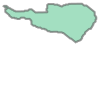

In [40]:
d3.loc[0,'geometry']

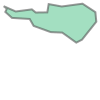

In [41]:
d3.loc[0,'geometry_simple']